**20250729 FRED Analysis - Cryptocurrency Time series**

The FRED recently has 4 new releases.  They are Coinbase cryptocurrency price time series.  

https://fred.stlouisfed.org/release?rid=441

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fredapi import Fred
from pandas_datareader import data as pdr

In [2]:
# Input FRED API key here
# fred_key ="Your FRED API Key here"
#fred_key =""
fred = Fred(fred_key)

**A quick look at the Coinbase Cryptocurrency Time Series**

1) Coinbase data series

   Coinbase Bitcoin (CBBTCUSD) in USD

   Coinbase Ethereum (CBETHUSD) in USD

   Coinbase Bitcoin Cash (CBBCHUSD) in USD

   Coinbase Litecoin (CBLTCUSD) in USD


In [3]:
#President Trump first term started on Jan 20, 2017.  
#To show the change in the indices during his first term, COVID and second term so far
#Let's start from beginning of 2017
start_date = "2017-01-01"
#end_date = '2023-12-31'

In [4]:
crytocurrency_id = ["CBBTCUSD", "CBETHUSD",
                 'CBBCHUSD', 'CBLTCUSD'
                 ]
df_crytocurrency_price = pdr.DataReader(crytocurrency_id, 'fred', start=start_date) #end=end_date)
df_crytocurrency_price.dropna()

,CBBTCUSD,CBETHUSD,CBBCHUSD,CBLTCUSD
DATE,,,,
2017-12-20,16496.89,802.86,3746.84,305.59
2017-12-21,15758.80,796.98,3162.53,311.00
2017-12-22,14210.57,682.11,2719.99,267.79
2017-12-23,15075.89,732.80,3160.00,293.03
2017-12-24,14221.94,697.04,2919.01,278.81
...,...,...,...,...
2025-07-23,118397.04,3708.60,513.47,112.28
2025-07-24,117633.27,3725.84,557.77,113.81
2025-07-25,117969.63,3743.06,558.93,113.95


In [5]:
df_crytocurrency_price_return = df_crytocurrency_price.pct_change(fill_method=None).dropna()
df_crytocurrency_price_return

,CBBTCUSD,CBETHUSD,CBBCHUSD,CBLTCUSD
DATE,,,,
2017-12-21,-0.044741,-0.007324,-0.155947,0.017703
2017-12-22,-0.098245,-0.144132,-0.139932,-0.138939
2017-12-23,0.060893,0.074314,0.161769,0.094253
2017-12-24,-0.056643,-0.048799,-0.076263,-0.048527
2017-12-25,-0.003513,0.062349,-0.028441,-0.018973
...,...,...,...,...
2025-07-23,-0.003479,0.021557,0.002088,0.001427
2025-07-24,-0.006451,0.004649,0.086276,0.013627
2025-07-25,0.002859,0.004622,0.002080,0.001230


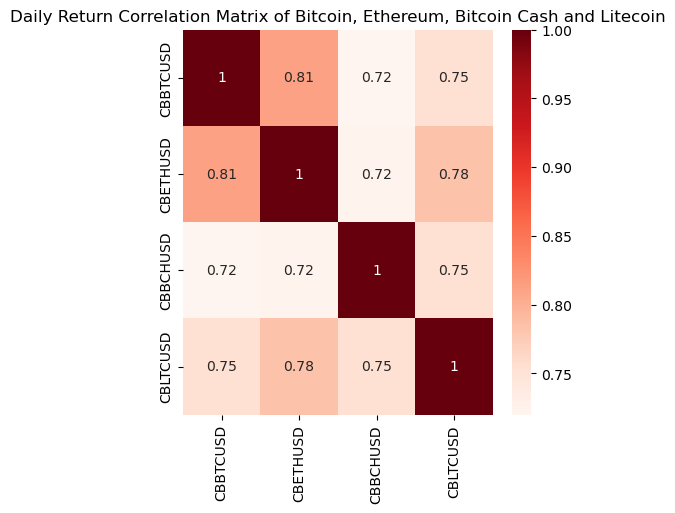

In [6]:
plt.figure(figsize = (5,5))
ax = plt.axes()
sns.heatmap(df_crytocurrency_price_return.corr(), cmap="Reds", annot=True, ax = ax)
ax.set_title('Daily Return Correlation Matrix of Bitcoin, Ethereum, Bitcoin Cash and Litecoin')
plt.show()

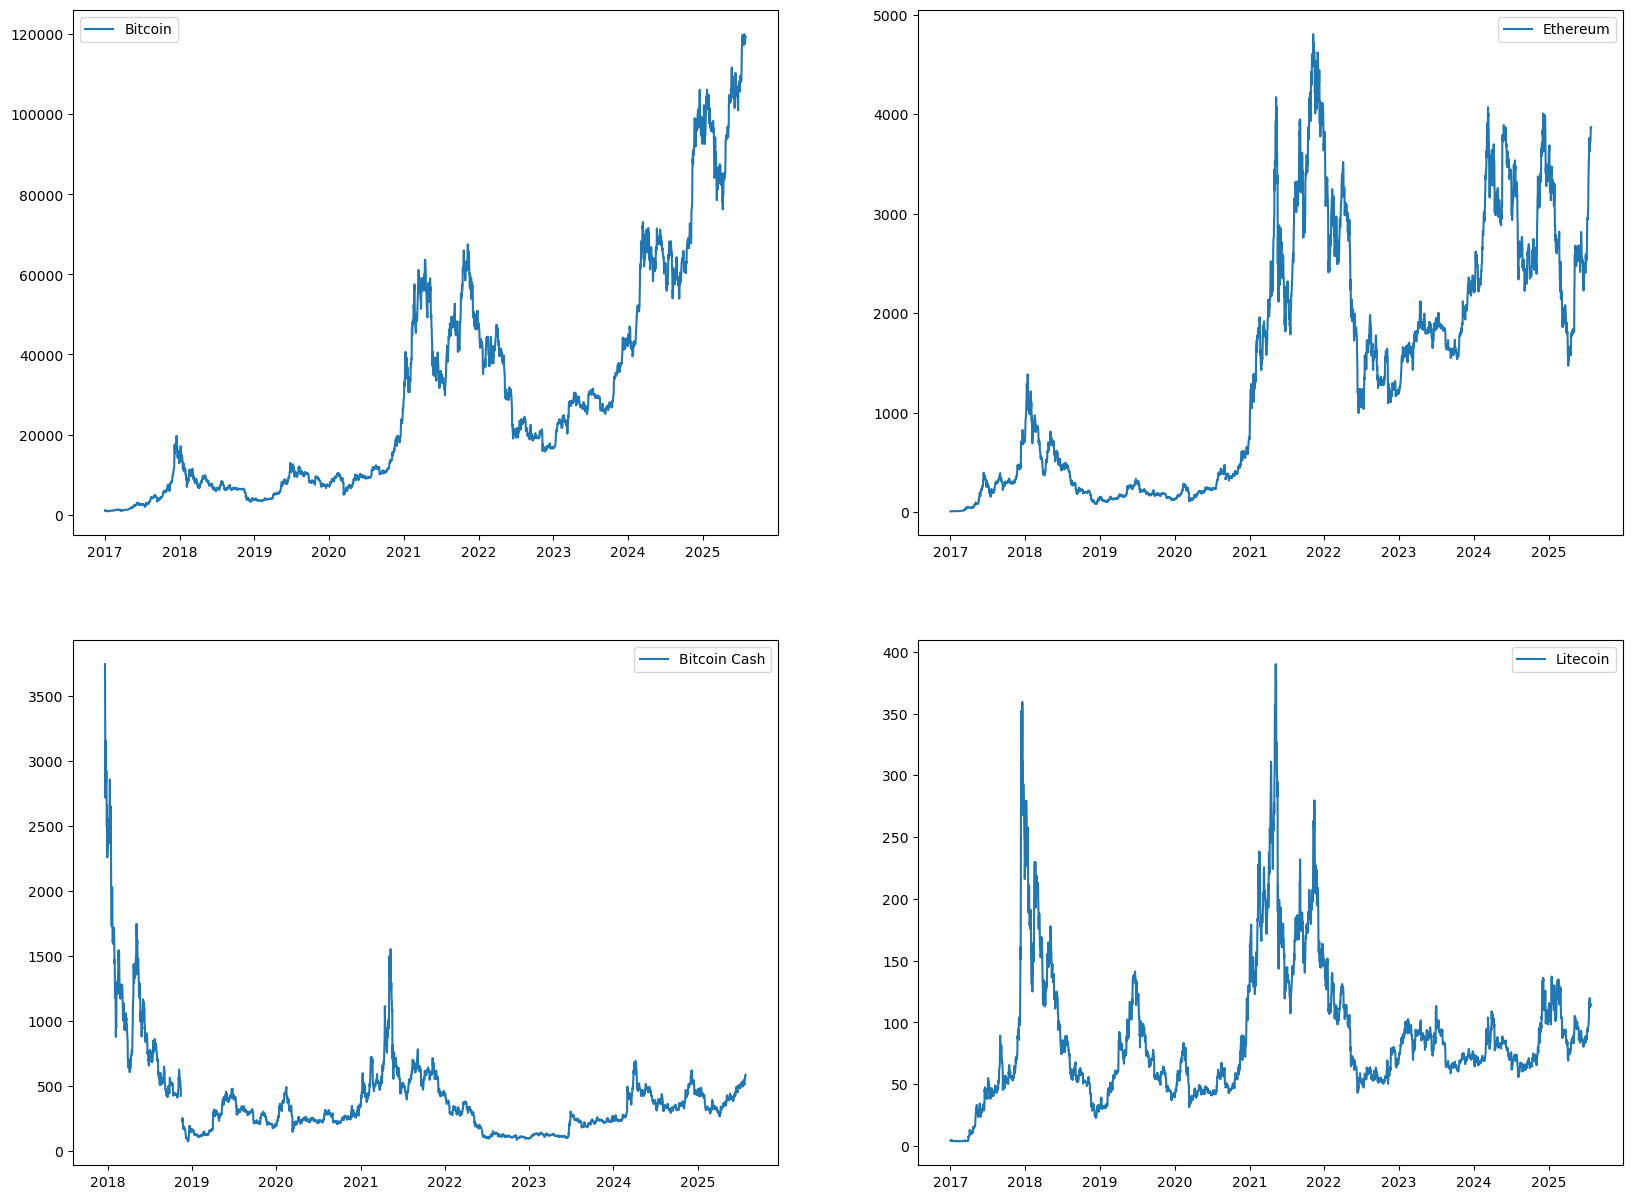

In [7]:
fig, axes = plt.subplots(2,2, figsize=(20,15))

axes[0][0].plot(df_crytocurrency_price.index,df_crytocurrency_price["CBBTCUSD"], label='Bitcoin')
axes[0][0].legend()
axes[0][1].plot(df_crytocurrency_price.index,df_crytocurrency_price["CBETHUSD"], label='Ethereum')
axes[0][1].legend()
axes[1][0].plot(df_crytocurrency_price.index,df_crytocurrency_price["CBBCHUSD"], label='Bitcoin Cash')
axes[1][0].legend()
axes[1][1].plot(df_crytocurrency_price.index,df_crytocurrency_price["CBLTCUSD"], label='Litecoin')
axes[1][1].legend()

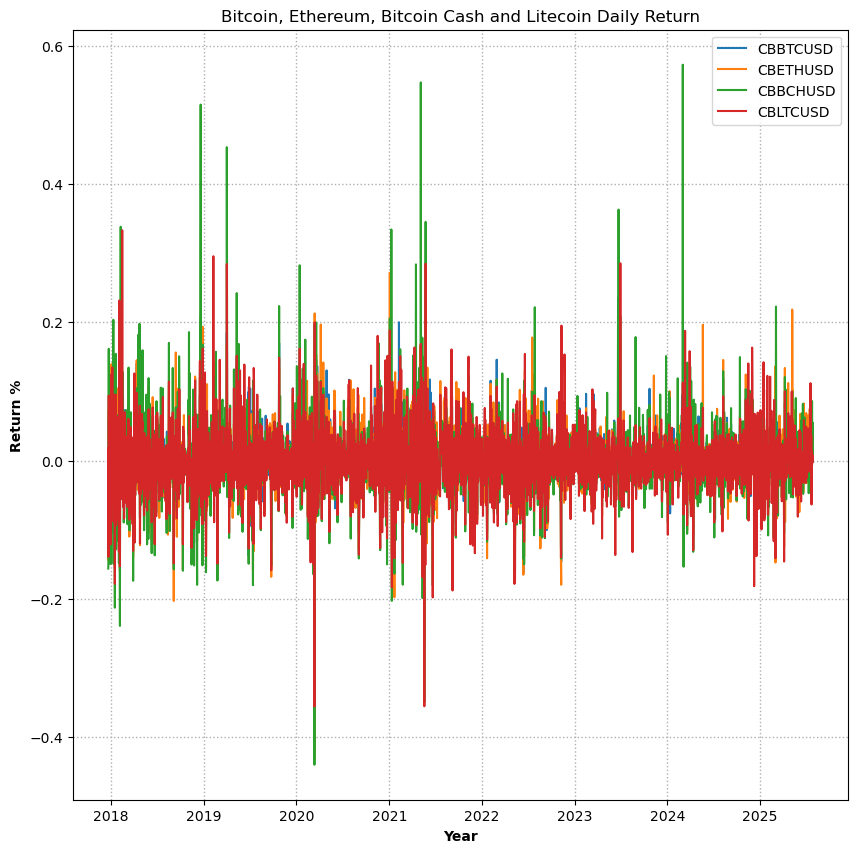

In [8]:
plt.figure(figsize = (10,10))
for i in range(len(df_crytocurrency_price_return.columns)):
    plt.plot(df_crytocurrency_price_return.index, df_crytocurrency_price_return.iloc[:,i].values, 
             label=df_crytocurrency_price_return.iloc[:,i].name)


plt.xlabel("Year", fontweight = 'bold')
plt.ylabel("Return %", fontweight = 'bold')
plt.title("Bitcoin, Ethereum, Bitcoin Cash and Litecoin Daily Return")
plt.grid(True, ls=':', lw=1)
plt.legend()
plt.show()


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

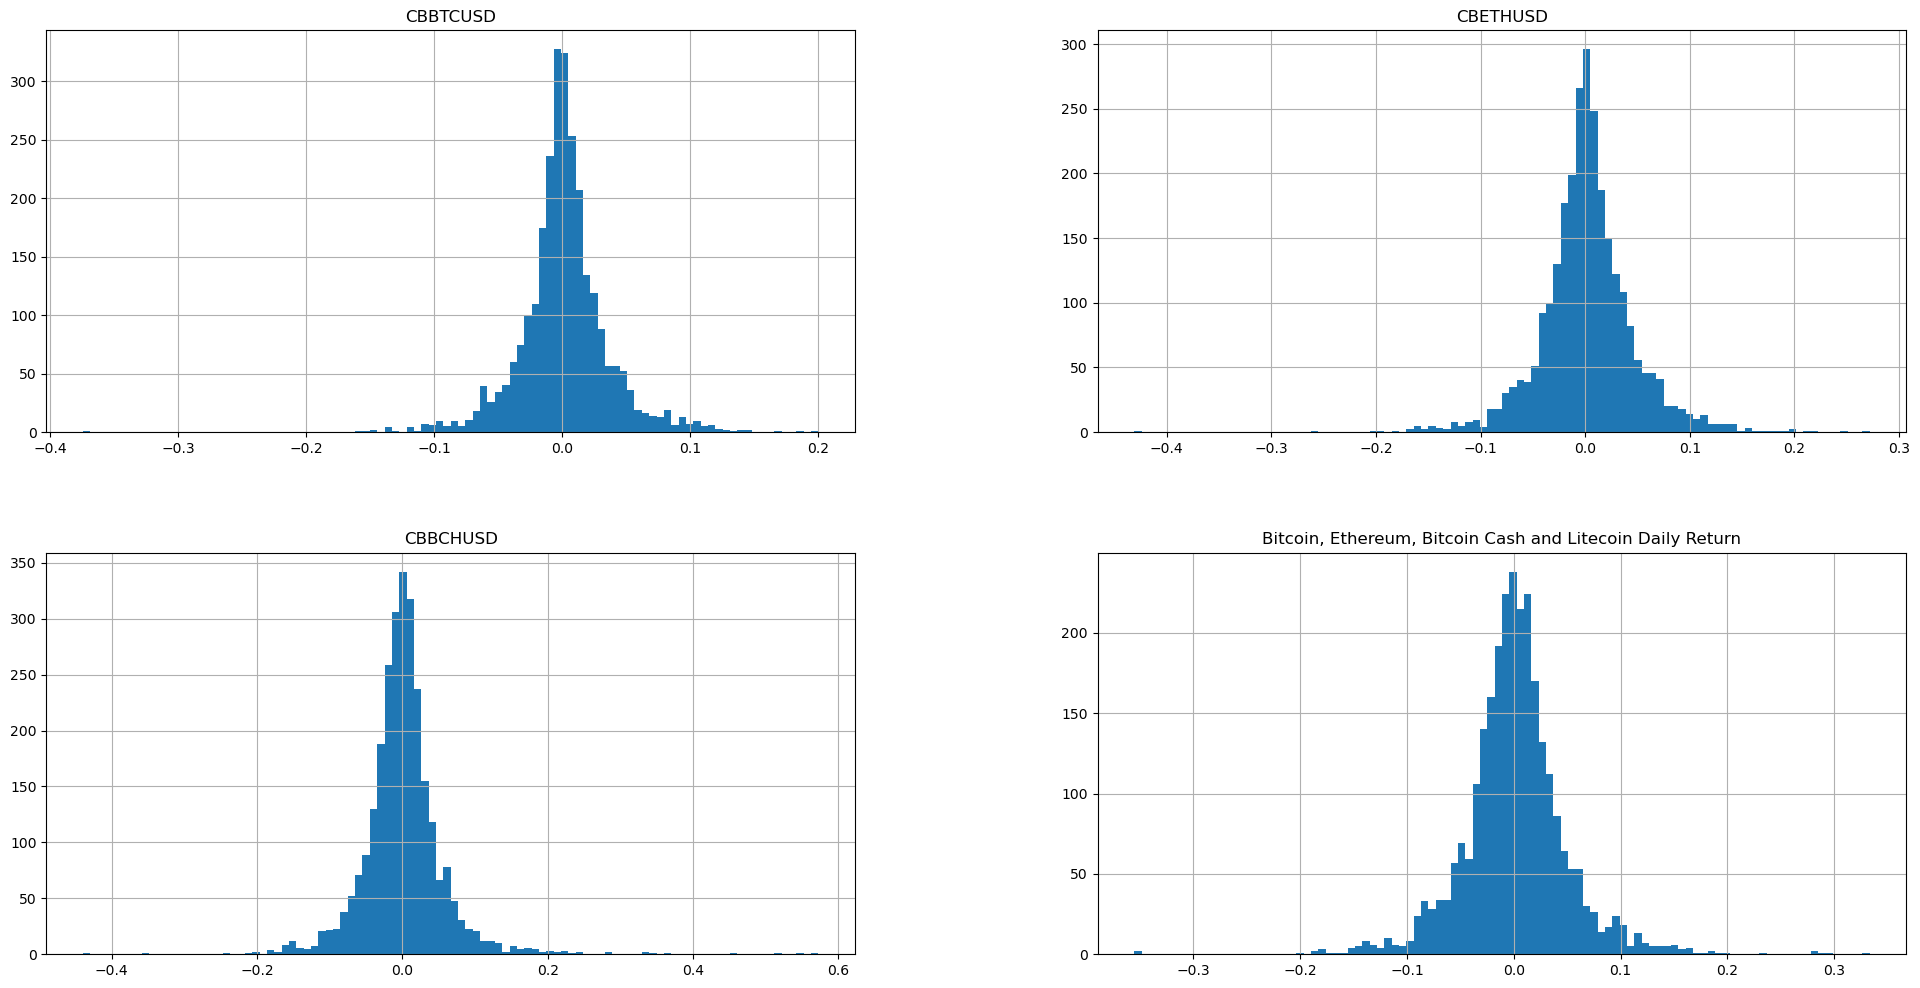

In [9]:
df_crytocurrency_price_return.hist(figsize = (24,12), bins=100)
plt.title('Bitcoin, Ethereum, Bitcoin Cash and Litecoin Daily Return')
plt.tight_layout

The four cryptocurrencies' daily returns are highly correlated (>0.7).  Bitcoin Cash seems to have more extreme outliners compared to the other three.